In [ ]:
import numpy as np

def read_csv(csv_path):
    # Indent this line to be part of the function body
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

In [ ]:
path_XYs = read_csv('/content/frag0.csv')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot(paths_XYs):
  fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
  colors =  ['b', 'g', 'r', 'c', 'm', 'y', 'k']
  for i, XYs in enumerate(path_XYs):
    c = colors[i % len(colors)]
    for XY in XYs:
        ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
  ax.set_aspect('equal')
  plt.show()

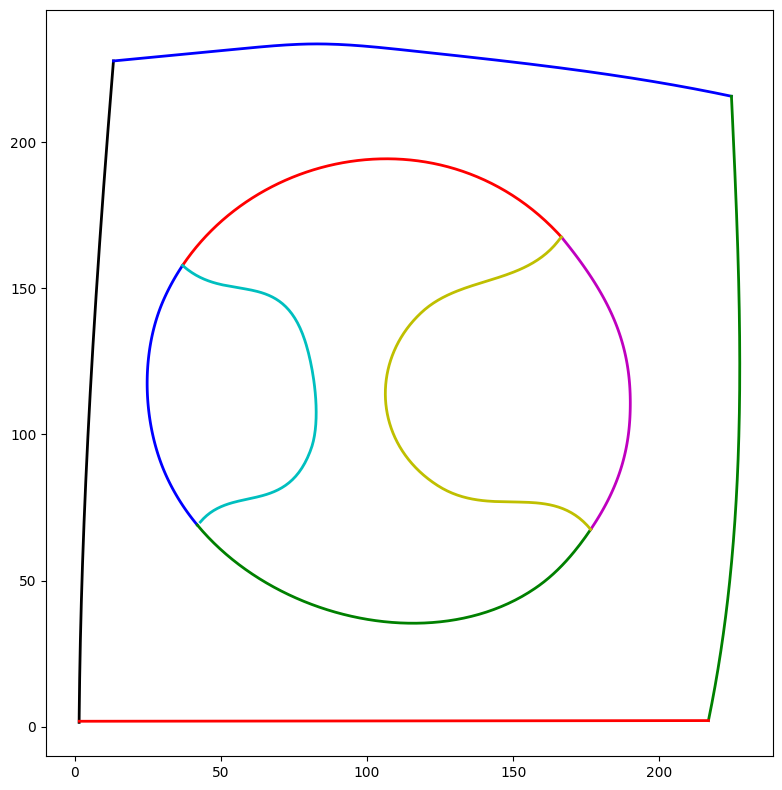

In [ ]:
plot(path_XYs)

In [ ]:
path_XYs = read_csv('/content/frag01_sol.csv')

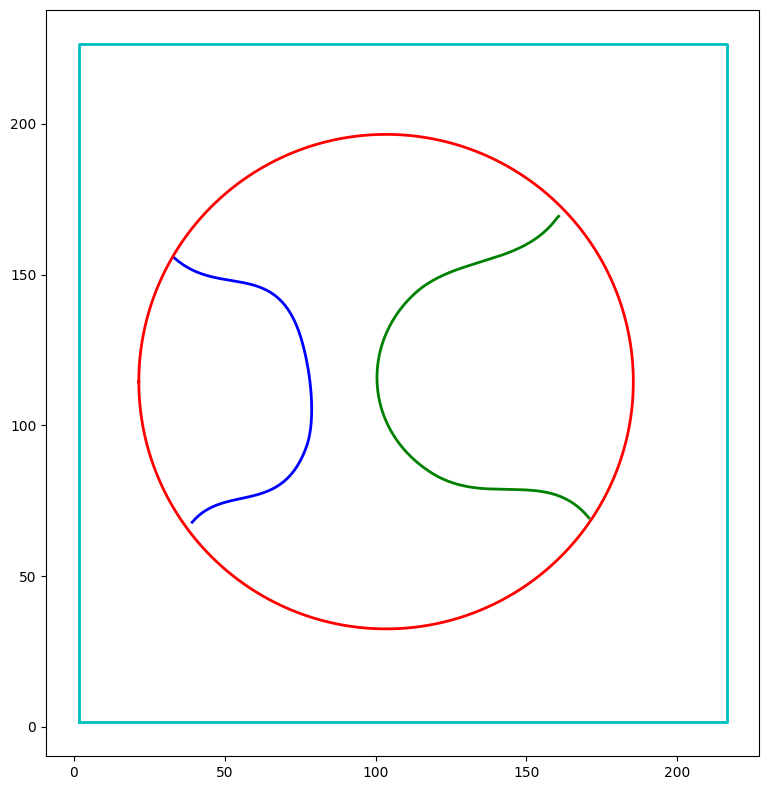

In [ ]:
plot(path_XYs)

In [ ]:
path_XYs = read_csv('/content/occlusion1.csv')

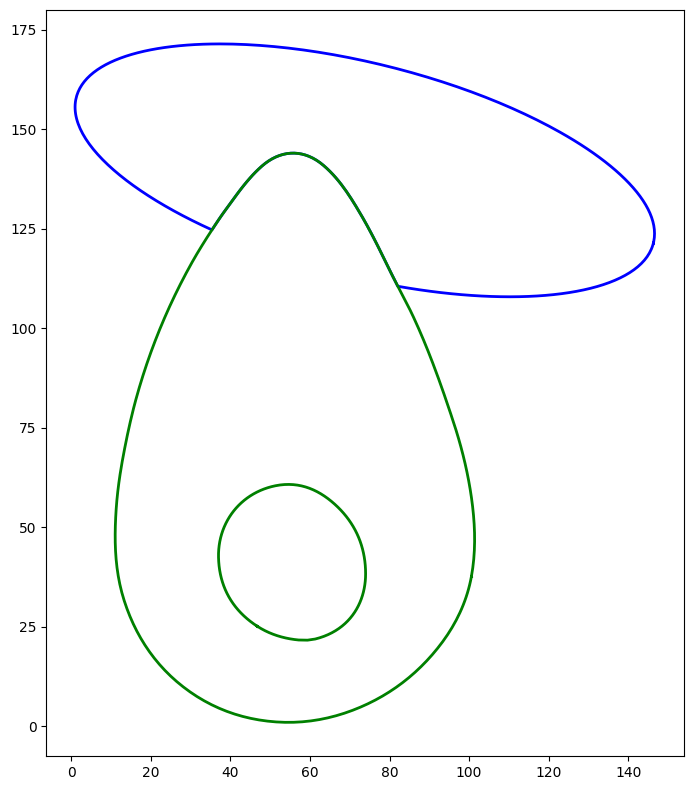

In [ ]:
plot(path_XYs)

In [ ]:
path_XYs = read_csv('/content/occlusion1_sol.csv')

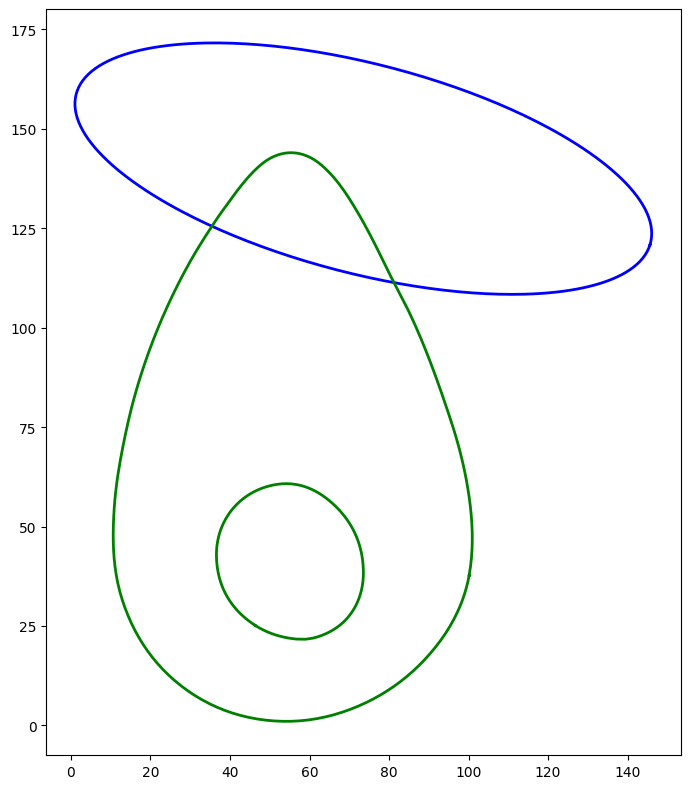

In [ ]:
plot(path_XYs)

In [ ]:
!pip install svgwrite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
def fit_circle(points):
    center = points.mean(axis=0)
    radius = np.mean(np.sqrt(np.sum((points - center) ** 2, axis=1)))
    return center, radius

def is_circle(points, tolerance=1e-2):
    center, radius = fit_circle(points)
    distances = np.sqrt(np.sum((points - center) ** 2, axis=1))
    return np.allclose(distances, radius, atol=tolerance)

points = np.array([[0, 1], [1, 0], [0, -1], [-1, 0]])  # A simple circle
print(is_circle(points))


from scipy.optimize import minimize

def fit_ellipse(points):
    def ellipse_loss(params):
        a, b, cx, cy = params
        return np.sum(((points[:, 0] - cx)**2 / a**2 + (points[:, 1] - cy)**2 / b**2 - 1) ** 2)


    x_m, y_m = np.mean(points, axis=0)
    initial_params = [1, 1, x_m, y_m]

    result = minimize(ellipse_loss, initial_params, method='L-BFGS-B')
    return result.x

def is_ellipse(points, tolerance=1e-2):
    a, b, cx, cy = fit_ellipse(points)
    lhs = (points[:, 0] - cx) ** 2 / a ** 2 + (points[:, 1] - cy) ** 2 / b ** 2
    return np.allclose(lhs, 1, atol=tolerance)


points = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])
print(is_ellipse(points))



from scipy.interpolate import splprep, splev

def polyline_to_bezier(points):
    tck, u = splprep([points[:, 0], points[:, 1]], s=0, k=3)
    u_new = np.linspace(0, 1, num=len(points)*10)
    x_new, y_new = splev(u_new, tck)
    bezier_points = np.stack((x_new, y_new), axis=-1)
    return bezier_points

bezier_curve = polyline_to_bezier(points)




def detect_symmetry(points):
    center = points.mean(axis=0)
    reflected_points = 2 * center - points
    return np.allclose(np.sort(reflected_points, axis=0), np.sort(points, axis=0))

points = np.array([[0, 0], [1, 1], [2, 2], [3, 3]])
print(detect_symmetry(points))

import svgwrite

def bezier_to_svg(bezier_points, svg_path):
    dwg = svgwrite.Drawing(svg_path, profile='tiny')
    path_data = f"M {bezier_points[0][0]},{bezier_points[0][1]} "
    for i in range(1, len(bezier_points), 3):
        path_data += f"C {bezier_points[i][0]},{bezier_points[i][1]} " \
                     f"{bezier_points[i+1][0]},{bezier_points[i+1][1]} " \
                     f"{bezier_points[i+2][0]},{bezier_points[i+2][1]} "
    dwg.add(dwg.path(d=path_data, stroke='black', fill='none'))
    dwg.save()

# Example usage:
bezier_to_svg(bezier_curve, "output.svg")



import os

def process_shapes(input_csv, output_svg):
    shapes = pd.read_csv(input_csv)
    bezier_shapes = []

    for shape in shapes:
        for points in shape:
            if is_straight_line(points):
                bezier_shapes.append(polyline_to_bezier(points))
            elif is_circle(points):
                bezier_shapes.append(polyline_to_bezier(points))
            elif is_ellipse(points):
                bezier_shapes.append(polyline_to_bezier(points))


    for bezier_shape in bezier_shapes:
        if detect_symmetry(bezier_shape):
            print("Symmetry detected.")

    bezier_to_svg(bezier_shapes[0], output_svg)


process_shapes("/content/frag0.csv", "output.svg")


True
True
True


NameError: name 'is_straight_line' is not defined

In [ ]:
import numpy as np

# Assuming read_csv is defined as per the previous discussion
path_XYs = read_csv('/content/occlusion1.csv')


In [ ]:
from scipy.interpolate import interp1d

# Example function to interpolate missing points in a curve segment
def interpolate_curve_segment(XY):
    x = XY[:, 0]
    y = XY[:, 1]

    # Create an interpolation function
    f = interp1d(x, y, kind='cubic', fill_value="extrapolate")

    # Generate new x values to interpolate over
    xnew = np.linspace(min(x), max(x), num=len(x)*10)

    # Interpolate to find y values for the new x values
    ynew = f(xnew)

    return np.column_stack((xnew, ynew))


In [ ]:
pip install opencv-python numpy matplotlib


In [ ]:
image_path = '/content/frag0.csv'

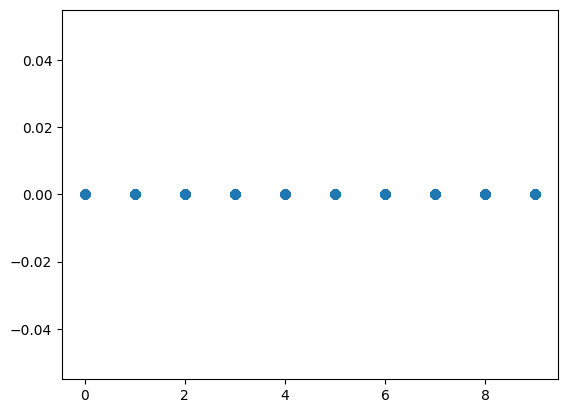

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def load_and_plot_csv_data(csv_path):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(csv_path, header=None)

    # Assuming the CSV has columns x, y
    x = df.iloc[:, 0].values
    y = df.iloc[:, 1].values

    # Plot the data
    plt.scatter(x, y)
    plt.show()

# Replace with the correct path to your CSV file
csv_path = '/content/frag0.csv'
load_and_plot_csv_data(csv_path)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load image - ensure the path is to a valid image file
    # Check if the file exists and has a valid image extension
    if not os.path.exists(image_path) or not image_path.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        print("Error: Invalid image path or file format.")
        return None  # Return None to indicate an error

    img = cv2.imread(image_path)

    if img is None:  # Check if image loading was successful
        print("Error: Failed to load image. Please check the file path.")
        return None

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray, 50, 150)

    return edges

# Example usage - replace with the correct path to your image file
image_path = 'path/to/your/image.jpg'
processed_image = preprocess_image(image_path)

if processed_image is not None:
    # Proceed with further processing or display the image
    plt.imshow(processed_image, cmap='gray')
    plt.show()

Error: Invalid image path or file format.


In [ ]:
preprocess_image('/content/frag0.csv')

Error: Invalid image path or file format.


In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

def load_points_from_csv(csv_path):
    df = pd.read_csv(csv_path, header=None)
    return df.values

def save_points_to_csv(points, csv_path):
    df = pd.DataFrame(points)
    df.to_csv(csv_path, index=False, header=False)

def detect_and_complete_shape(points):
    centroid = np.mean(points, axis=0)


    distances = np.sqrt(np.sum((points - centroid)**2, axis=1))

    # Simple heuristic to determine shape based on distance variance
    if np.var(distances) < 1e-4:  # Assuming small variance indicates a circle
        print("Detected a circle.")
        # Circle completion logic here (simple case, might need refinement)
    else:
        print("Detected an ellipse or incomplete shape.")
        # Ellipse/incomplete shape completion logic here

    # Placeholder for completion result
    completed_points = points  # Replace with actual completion logic

    return completed_points

def main():
    csv_path = '/content/frag0.csv'
    output_csv_path = '/content/output.xls'

    points = load_points_from_csv(csv_path)
    completed_points = detect_and_complete_shape(points)

    save_points_to_csv(completed_points, output_csv_path)
    print(f"Completed shape saved to {output_csv_path}")

if __name__ == "__main__":
    main()


Detected an ellipse or incomplete shape.
Completed shape saved to /content/output.xls


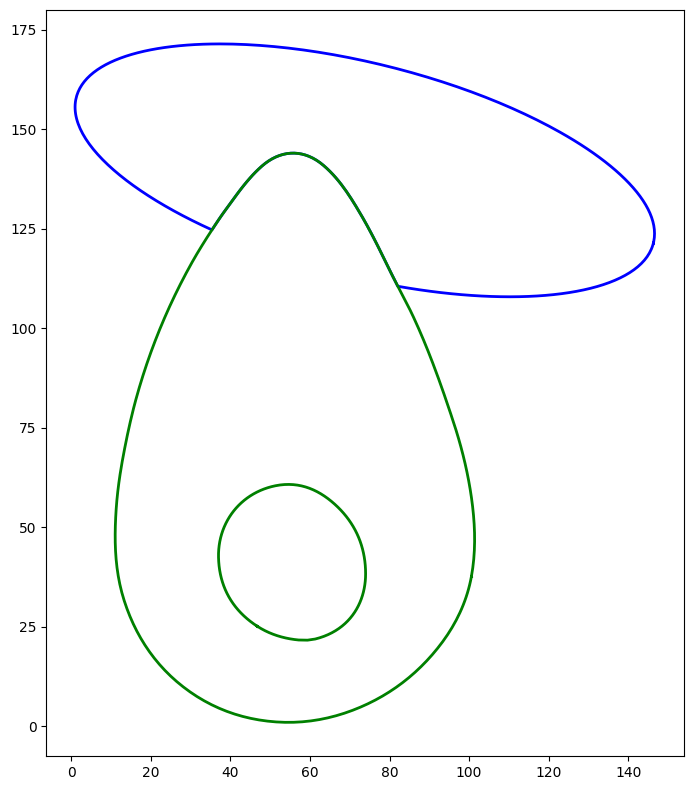

In [ ]:
plot(output_csv_path)

In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import CubicSpline

def complete_incomplete_curve(csv_path, output_csv_path):
    df = pd.read_csv(csv_path, header=None)

    x = df.iloc[:, 0].values
    y = df.iloc[:, 1].values

    x, indices = np.unique(x, return_index=True)
    y = y[indices]

    sorted_indices = np.argsort(x)
    x = x[sorted_indices]
    y = y[sorted_indices]


    cs = CubicSpline(x, y)


    xnew = np.linspace(min(x), max(x), num=len(x)*10)

    ynew = cs(xnew)


    completed_df = pd.DataFrame({'x': xnew, 'y': ynew})


    completed_df.to_csv(output_csv_path, index=False, header=False, mode='w')

    print(f"Completed curve saved to {output_csv_path}")


csv_path = '/content/frag0.csv'
output_csv_path = '/content/Blank-CSV-Template.csv'
complete_incomplete_curve(csv_path, output_csv_path)

Completed curve saved to /content/Blank-CSV-Template.csv


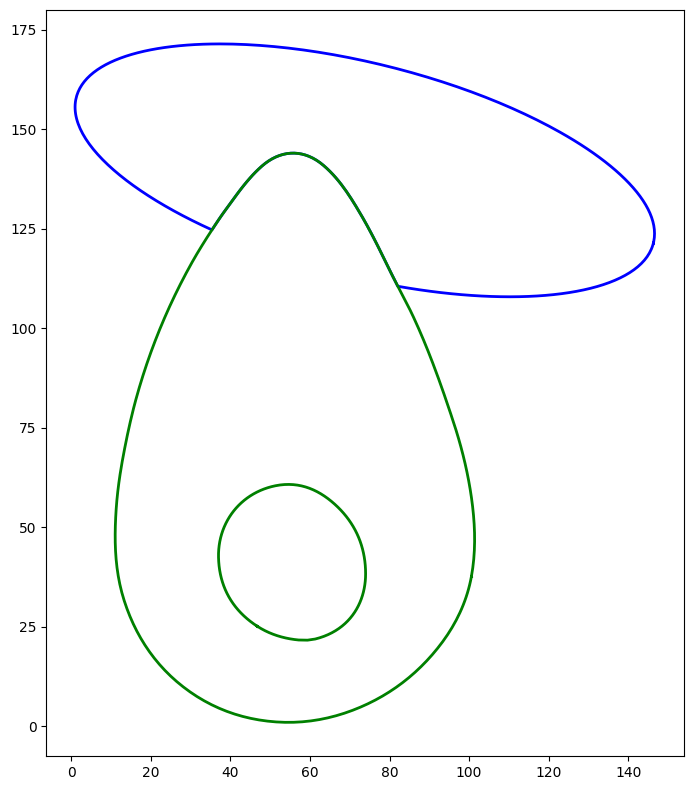

In [ ]:
plot('/content/Blank-CSV-Template.csv')

In [ ]:
import pandas as pd
import numpy as np

def is_doodle_complete(csv_path):

    df = pd.read_csv(csv_path, header=None)


    x = df.iloc[:, 0].values
    y = df.iloc[:, 1].values

    distances = np.sqrt((np.diff(x)**2 + np.diff(y)**2))

    total_distance = np.sum(distances)
    average_distance = np.mean(distances)
    max_distance = np.max(distances)

    threshold = 2 * np.pi * max_distance

    if abs(total_distance - threshold) < 0.01:
        return True
    else:
        return False


csv_path = '/content/frag0.csv'
is_complete = is_doodle_complete(csv_path)
print(f"Doodle is complete: {is_complete}")


Doodle is complete: False


In [ ]:
import numpy as np
import pandas as pd

def complete_curve(csv_path):
    df = pd.read_csv(csv_path, header=None)


    x = df.iloc[:, 0].values
    y = df.iloc[:, 1].values

    x = np.append(x, x[0])
    y = np.append(y, y[0])


    output_csv_path = '/content/Blank-CSV-Template.csv'
    df_completed = pd.DataFrame({'x': x, 'y': y})
    df_completed.to_csv(output_csv_path, index=False, header=False, mode='w')

    print(f"Curve completed and saved to {output_csv_path}")


csv_path = '/content/frag0.csv'
complete_curve(csv_path)


Curve completed and saved to /content/Blank-CSV-Template.csv


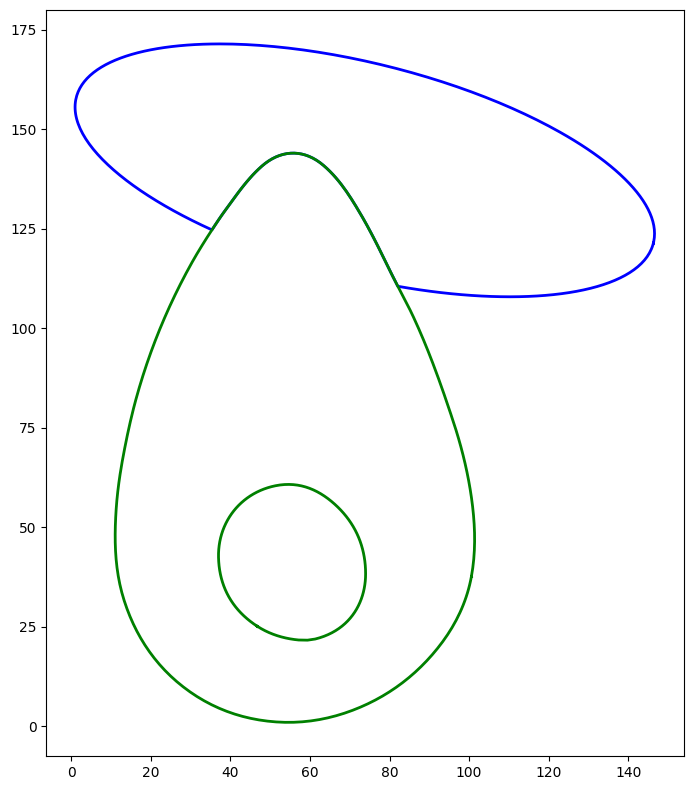

In [ ]:
plot('/content/Blank-CSV-Template.csv')

In [ ]:
import numpy as np
import pandas as pd

def detect_incomplete_doodles(csv_path):

    df = pd.read_csv(csv_path, header=None)
    x = df.iloc[:, 0].values
    y = df.iloc[:, 1].values

    distances = np.sqrt((np.diff(x)**2 + np.diff(y)**2))

    gap_threshold = 50
    gaps = distances > gap_threshold

    if np.any(gaps):
        print("Potential gaps detected in the doodle.")
    else:
        print("No potential gaps detected.")


csv_path = '/content/frag0.csv'
detect_incomplete_doodles(csv_path)


No potential gaps detected.


In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import leastsq
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN

def fit_ellipse(points):
    """
    Fits an ellipse to a set of points using least squares.
    Returns the ellipse parameters (center, width, height, rotation).
    """
    def residuals(params, x, y):
        xc, yc, w, h, theta = params
        x -= xc
        y -= yc
        a = w / 2
        b = h / 2
        angle = np.degrees(np.arctan2(np.tan(theta)))

        x_rotated = x * np.cos(angle) + y * np.sin(angle)
        y_rotated = -x * np.sin(angle) + y * np.cos(angle)

        rx = x_rotated / a
        ry = y_rotated / b

        return rx**2 + ry**2 - 1

    initial_guess = [points.mean(axis=0)[0], points.mean(axis=0)[1], 1, 1, 0]
    errfunc = lambda p, x, y: residuals(p, x, y)
    popt, pcov = leastsq(errfunc, initial_guess, args=(points[:, 0], points[:, 1]))

    return popt[:2], popt[2], popt[3], popt[4]

def analyze_ellipses(points, min_points=100):
    """
    Analyzes a set of points to identify potential ellipses and assess their completeness.
    Returns a list of tuples, each containing the ellipse parameters and a boolean indicating completeness.
    """

    db = DBSCAN(eps=20, min_samples=min_points).fit(points)
    labels = db.labels_

    ellipses = []
    for label in np.unique(labels):
        if label == -1:
            continue

        cluster_points = points[labels == label]

        center, width, height, rotation = fit_ellipse(cluster_points)

        completeness = True

        ellipses.append((center, width, height, rotation, completeness))

    return ellipses

def main():

    df = pd.read_csv('/content/frag0.csv', header=None)
    points = df.values


    ellipses = analyze_ellipses(points)
    for i, (center, width, height, rotation, complete) in enumerate(ellipses):
        print(f"Ellipse {i+1}: Center={center}, Width={width}, Height={height}, Rotation={rotation}, Complete={complete}")

if __name__ == "__main__":
    main()


start

In [ ]:
import numpy as np
from scipy.ndimage import label


data = np.genfromtxt('/content/frag0.csv', delimiter=',').astype(int)


In [ ]:
pip install numpy opencv-python


In [ ]:
import numpy as np
import cv2

def load_csv_as_binary_image(csv_path):
    """Load CSV data as a binary image."""
    data = np.genfromtxt(csv_path, delimiter=',').astype(np.uint8)
    return data

def detect_shape_occlusions(binary_image):
    """Detect fully contained, partially contained but connected, and disconnected shapes."""

    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    fully_contained = []
    partially_contained = []
    disconnected = []

    for i, cnt1 in enumerate(contours):
        for j, cnt2 in enumerate(contours[i+1:], start=i+1):

            for point in cnt1:
                x, y = point[0]
                if cv2.pointPolygonTest(cnt2, (int(x), int(y)), False) > 0:
                    fully_contained.append((i, j))
                    break
            dist = cv2.contourArea(cv2.convexHull(np.concatenate((cnt1, cnt2))))
            if dist < (cv2.contourArea(cnt1) + cv2.contourArea(cnt2)):
                disconnected.append((i, j))

    return fully_contained, partially_contained, disconnected


csv_path = '/content/frag0.csv'
binary_image = load_csv_as_binary_image(csv_path)
fully_contained, partially_contained, disconnected = detect_shape_occlusions(binary_image)

print("Fully Contained:", fully_contained)
print("Partially Contained but Connected:", partially_contained)
print("Disconnected:", disconnected)

Fully Contained: []
Partially Contained but Connected: []
Disconnected: []


In [ ]:
import pandas as pd

chunksize = 10 ** 6
chunks = []

for chunk in pd.read_csv('/content/frag0.csv', chunksize=chunksize):
    chunks.append(chunk)

df = pd.concat(chunks, axis=0)


In [ ]:
print(df.head())


   0.000000000000000000e+00  0.000000000000000000e+00.1  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       0.0                         0.0   
4                       0.0                         0.0   

   4.194200134277343750e+01  6.898000335693359375e+01  
0                 41.259605                 69.811707  
1                 40.588753                 70.652374  
2                 39.929607                 71.501953  
3                 39.282337                 72.360405  
4                 38.647114                 73.227669  


In [ ]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')


In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)


                            0.000000000000000000e+00  \
0.000000000000000000e+00                    1.000000   
0.000000000000000000e+00.1                       NaN   
4.194200134277343750e+01                    0.292250   
6.898000335693359375e+01                   -0.121106   

                            0.000000000000000000e+00.1  \
0.000000000000000000e+00                           NaN   
0.000000000000000000e+00.1                         NaN   
4.194200134277343750e+01                           NaN   
6.898000335693359375e+01                           NaN   

                            4.194200134277343750e+01  6.898000335693359375e+01  
0.000000000000000000e+00                    0.292250                 -0.121106  
0.000000000000000000e+00.1                       NaN                       NaN  
4.194200134277343750e+01                    1.000000                  0.000278  
6.898000335693359375e+01                    0.000278                  1.000000  


In [ ]:
import pandas as pd

column_names = pd.read_csv('/content/frag0.csv', nrows=0).columns.tolist()
print(column_names)


['0.000000000000000000e+00', '0.000000000000000000e+00.1', '4.194200134277343750e+01', '6.898000335693359375e+01']


In [ ]:
import matplotlib.pyplot as plt
import csv


In [ ]:
x = []
y = []

with open('/content/frag0.csv', 'r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        x.append(row[0])
        y.append(float(row[1]))

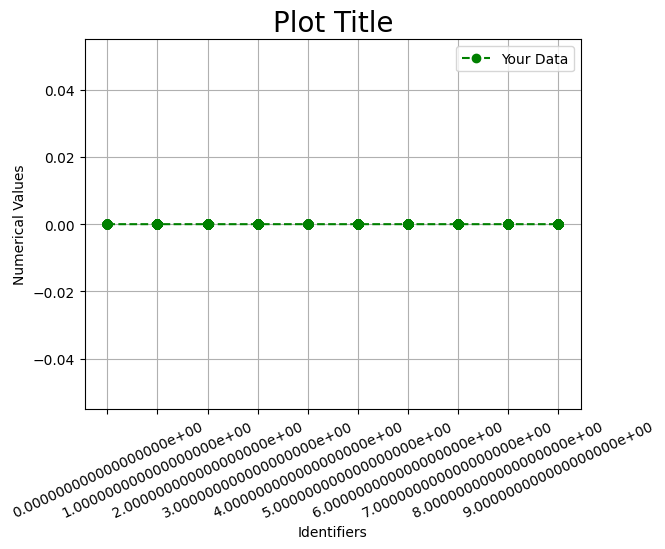

In [ ]:
plt.plot(x, y, color='g', linestyle='dashed', marker='o', label="Your Data")
plt.xticks(rotation=25)
plt.xlabel('Identifiers')
plt.ylabel('Numerical Values')
plt.title('Plot Title', fontsize=20)
plt.grid()
plt.legend()
plt.show()
